In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import os
from os import walk

In [2]:
#load data
mypath='My Data/'
#load data
dtEifel=np.load(mypath+ 'full_numpy_bitmap_The Eiffel Tower.npy')
dtGreatWall=np.load(mypath+'full_numpy_bitmap_The Great Wall of China.npy')
dtMonalisa=np.load(mypath+'full_numpy_bitmap_The Mona Lisa.npy')
dtall=np.concatenate((dtEifel,dtGreatWall,dtMonalisa),axis=0)

In [3]:
a=[]
for i in range(0,len(dtall)):
    if(i<len(dtEifel)):
        a.append([0])
    elif(i<len(dtGreatWall)+len(dtEifel)):
        a.append([1])
    else:
        a.append([2])
Outputs=np.array(a)

In [4]:
inputs=dtall
minMaxScaler= MinMaxScaler()
minMaxScaler.fit(inputs)
inputs=minMaxScaler.transform(inputs)
inputs=np.reshape(inputs,(len(inputs),28,28,1))

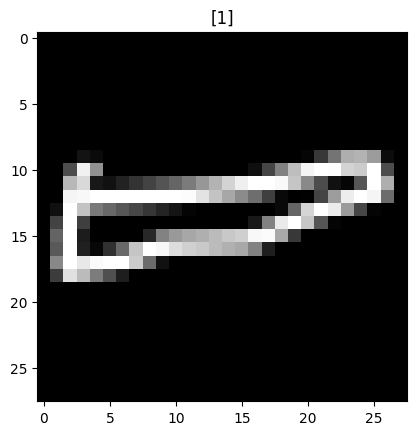

In [5]:
i=300000
plt.imshow(inputs[i], cmap='gray')
plt.title(str(Outputs[i]))
plt.show()


In [6]:
X_train, X_test, y_train, y_test = train_test_split(inputs, Outputs, test_size=0.6, random_state=42)

In [7]:
X_train[0,10]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.03137255],
       [0.89019608],
       [0.74509804],
       [0.3372549 ],
       [0.88235294],
       [0.82745098],
       [0.75686275],
       [0.77647059],
       [0.85882353],
       [1.        ],
       [0.56078431],
       [0.14509804],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

In [8]:

'''

model.add(tf.keras.layers.Conv2D(8, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(8, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(tf.keras.layers.UpSampling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(16, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(tf.keras.layers.UpSampling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(1, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(tf.keras.layers.UpSampling2D((2, 2))
'''
model=tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(16, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(32,activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(tf.keras.layers.Dense(16,activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(tf.keras.layers.Dense(3,activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy','sparse_categorical_crossentropy'])
model.summary()

c:\Users\tecyo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
print(X_train.shape)
print(y_train)

(179679, 28, 28, 1)
[[0]
 [1]
 [2]
 ...
 [0]
 [1]
 [0]]


In [10]:
checkpoint = ModelCheckpoint('best_weights.keras', monitor='accuracy', save_best_only=True)
#model.fit(X_train[:1], y_train[:1], epochs=1,batch_size=320)
#model.load_weights('best_weights2.keras')
model.fit(X_train, y_train, epochs=1500,batch_size=320,callbacks=[checkpoint])

KeyboardInterrupt: 

In [ ]:
tf.config.list_physical_devices(
    device_type=None
)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
model.load_weights('best_weights2.keras')
model.evaluate(X_test, y_test)

8423/8423 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.9745 - loss: 0.1827 - sparse_categorical_crossentropy: 0.1827


[0.17967984080314636, 0.9750667810440063, 0.17967456579208374]